In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
dataset_root = 'data/'
#preprocessed_articles = pd.read_csv(dataset_root + 'preprocessed_articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
#articles = pd.read_csv(dataset_root + 'articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
articles = pd.read_csv(dataset_root + 'preprocessed_articles.csv',sep = ';',index_col = [0], encoding = "utf-8")
articles['title'] = articles['title'].str.replace('\W', ' ') # Remove special characters from titles
articles['content'] = articles['content'].str.replace('\W', ' ') # Remove special character from content
articles = articles.rename(columns = {'region':'regione', 'date':'data'})
articles

,title,content,data,author,regione,zone
0,d albert riunion anci regional decar,teram president gianguid d albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,coronavirus novit introdott dpcm 10 april 2020,sit minister dell intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,coronavirus nuov misur vend gener alimentar a...,pescar oggi mercoled 15 aprile president reg...,2020-04-15,Abruzzonews,Abruzzo,Centre
3,regione ecco guid formazion distanz iefp,pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
4,ministr amendol oddat all iniz pd abruzz facebook,region le scelt pd l ital l abruzzo intito...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24579,cop pir giornal telegram salg 114 canal oscur,sal 114 numer canal telegram sequestr procur b...,2020-05-04,La Repubblica,Lazio,Centre
24580,inchiest sanit umbra chius indagini l ex gov...,chiusur dell indagin assunzion sanità destabi...,2020-05-04,La Repubblica,Lazio,Centre
24581,coronavirus italia 3691 denunc prim giorn fas 2,rom aspett boom sanzion prim giorn fas due ...,2020-05-05,La Repubblica,Lazio,Centre
24582,coronavirus medicina denunc azione tropp p...,ventiduemil medic pront entrar specialità and...,2020-05-06,La Repubblica,Lazio,Centre


In [3]:
import nltk
from nltk.corpus import stopwords
stop_words_italian = stopwords.words('italian')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words= stop_words_italian)
doc_term_matrix = tfidf_vect.fit_transform((articles.title + articles.content).values)

In [5]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, random_state=42)
nmf.fit(doc_term_matrix)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [6]:
topic_values = nmf.transform(doc_term_matrix)
articles['topic'] = topic_values.argmax(axis=1)

In [7]:
topic_keywords = []

for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    topic_keyword_list = [tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-50:]]
    topic_keywords.append(topic_keyword_list)
    print(topic_keyword_list)
    
    print('\n')
    
topic_keywords = topic_keywords[-1] # Keep the last

Top 10 words for topic #0:
['quand', 'reat', 'ordin', 'mentr', 'esser', 'compagn', 'intern', 'fatt', 'strad', 'sostanz', 'tre', 'propr', 'incident', 'spacc', 'senz', 'procur', 'oper', 'interven', 'cors', 'press', 'abit', 'sequestr', 'alcun', 'forz', 'local', 'aver', 'fuoc', 'militar', 'poi', 'prim', 'giovan', 'ferm', 'vigil', 'port', 'fin', 'donn', 'agent', 'post', 'trov', 'via', 'dop', 'denunc', 'uom', 'controll', 'anni', 'poliz', 'due', 'carabinier', 'arrest', 'stat']


Top 10 words for topic #1:
['esser', 'struttur', 'iniz', 'ieri', 'guar', 'virus', 'ore', 'casi', 'regional', 'attiv', 'ultim', 'sal', 'decess', 'tutt', 'comun', 'sol', 'total', 'registr', 'medic', 'asl', 'president', 'isol', 'prim', 'emergt', 'stat', 'mort', 'oggi', 'terap', 'dat', 'lavor', 'risult', 'test', 'sanitar', 'ospedal', 'rispett', 'giorn', 'provinc', 'numer', 'ricover', 'region', 'tampon', 'nuov', '19', 'contag', 'person', 'pazient', 'covid', 'posit', 'cas', 'coronavirus']




In [8]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df, keywords) :
    for col in keywords :
        df[col] = 0
        
    
        #indexes = articles[k in articles.content].index
        
        #articles.loc[indexes, k] = 1
        
        #if any(word in 'some one long two phrase three' for word in list_):
    
    for k in keywords:
        indexes = df[df['content'].str.contains(k)].index
        df.loc[indexes, k] = 1
        
    return df

articles = one_hot_encoding(articles, topic_keywords)
articles = articles.groupby('data').sum()

In [9]:
prociv_data = pd.read_csv(dataset_root + 'prociv_data.csv', sep = ';', index_col = [0])
prociv_data = prociv_data.rename(columns = {'denominazione_regione':'regione'})
#prociv_data = prociv_data[prociv_data.regione == 'Lombardia']
prociv_data

regions = prociv_data.regione.unique().tolist()
regions

def one_hot_encoding_regions(df, regions) :
    for col in regions :
        df[col] = 0
        
    
        #indexes = articles[k in articles.content].index
        
        #articles.loc[indexes, k] = 1
        
        #if any(word in 'some one long two phrase three' for word in list_):
    
    for k in regions:
        indexes = df[df['regione'].str.contains(k)].index
        df.loc[indexes, k] = 1
        
    return df


In [10]:
prociv_national = prociv_data.groupby('data').sum()
prociv_national = prociv_national.reset_index()

In [11]:
complete_dataset = articles.merge(prociv_national, on = 'data')
target = complete_dataset['totale_casi'].values

In [12]:
# In case we want to expand the dataset, merge here

In [13]:
from datetime import date
import datetime

def date_to_delta_time(date):
    '''
    tokens = [int(x) for x in date.split('-')]
    
    d0 = date(2020, 1, 1)
    d1 = date(tokens[0], tokens[1], tokens[2])
    delta = d1 - d0
    print(delta.days)
    '''
    
    date_time_str = date
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')

    return int(date_time_obj.timestamp() / (60 * 60 * 24) )
    
complete_dataset = articles.reset_index()
complete_dataset['timestamp'] = [date_to_delta_time(complete_dataset.loc[i, 'data']) for i in complete_dataset.index]
complete_dataset.drop(columns = ['data'], inplace = True)

In [14]:
prociv_national['data'] = [int(date_to_delta_time(d)) for d in prociv_national['data'].values]
prociv_national

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,nuovi_tamponi,nuovi_casi_testati,nuovi_deceduti
0,18315,101,26,127,94,221,0,221,1,7,0.0,0.0,229,4324,0.0,4324,0.0,7
1,18316,114,35,149,162,311,90,93,1,10,0.0,0.0,322,8623,0.0,4299,0.0,3
2,18317,128,36,164,221,385,74,78,3,12,0.0,0.0,400,9587,0.0,964,0.0,2
3,18318,248,56,304,284,588,203,250,45,17,0.0,0.0,650,12014,0.0,2427,0.0,5
4,18319,345,64,409,412,821,233,238,46,21,0.0,0.0,888,15695,0.0,3681,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,18461,743,49,792,11648,12440,72,219,196949,35045,222180.0,22254.0,244434,6238049,3740447.0,35525,20621.0,3
147,18462,745,47,792,11612,12404,-36,190,197162,35058,222212.0,22412.0,244624,6262302,3754568.0,24253,14121.0,13
148,18463,732,49,781,11467,12248,-156,129,197431,35073,222232.0,22520.0,244752,6305412,3778483.0,43110,23915.0,15
149,18464,724,48,772,11550,12322,74,282,197628,35082,222220.0,22812.0,245032,6354730,3807771.0,49318,29288.0,9


/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


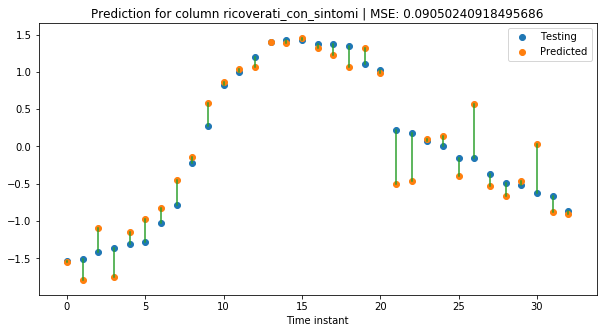

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


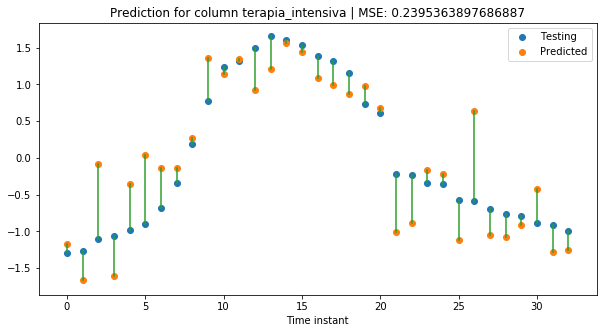

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


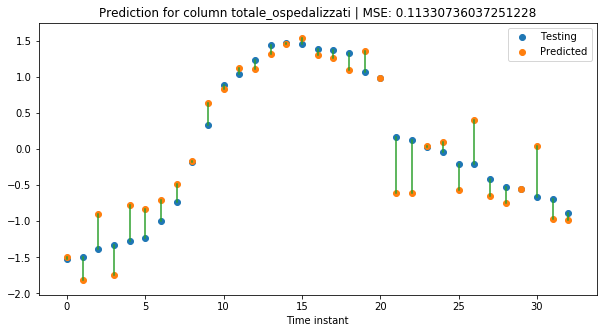

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


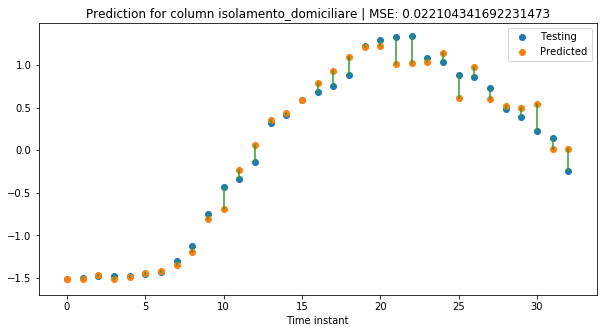

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


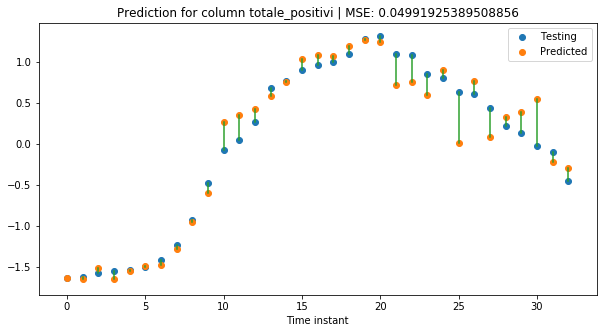

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


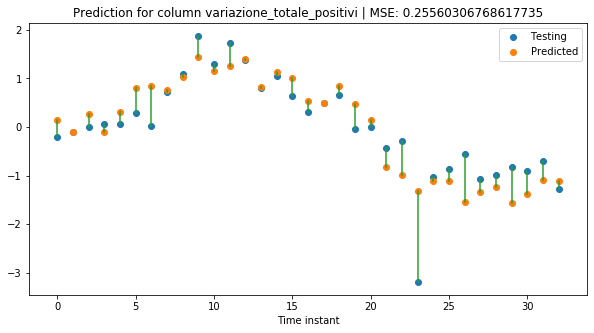

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


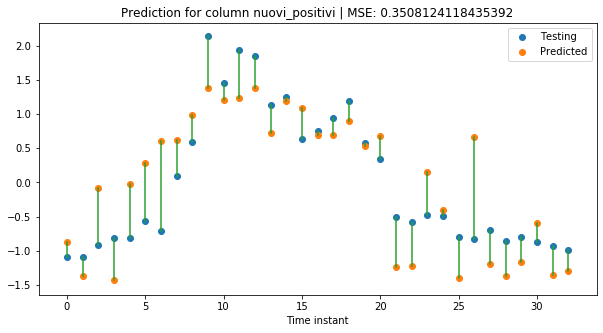

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


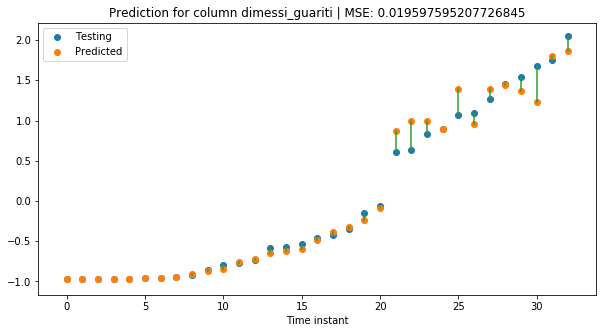

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


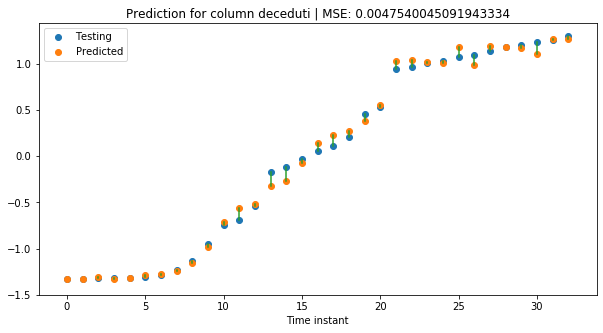

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


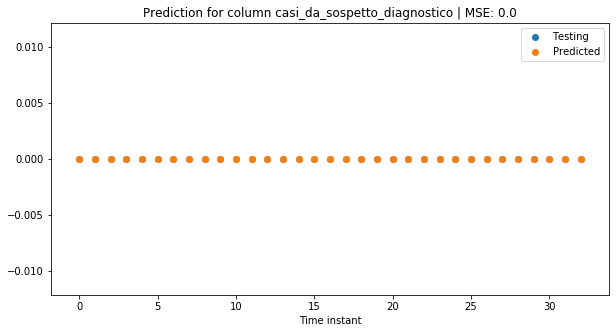

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


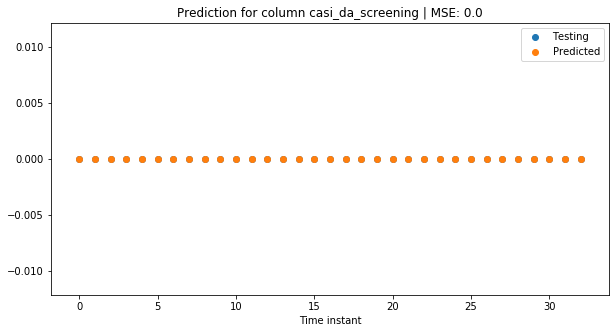

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


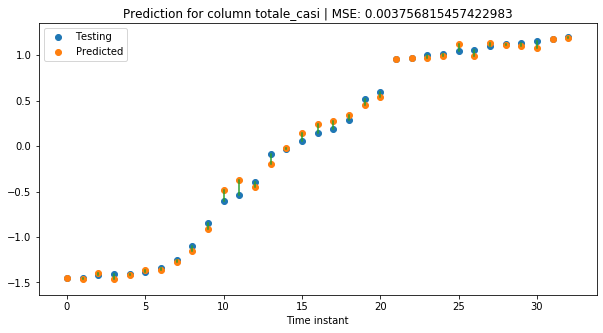

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


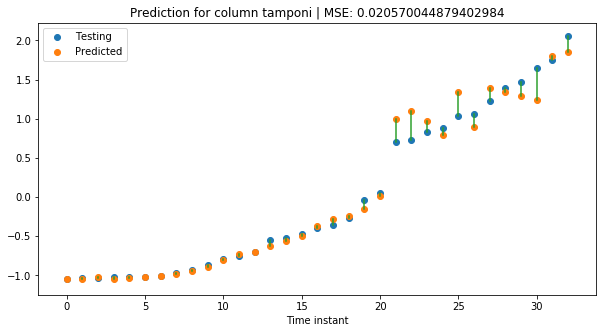

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


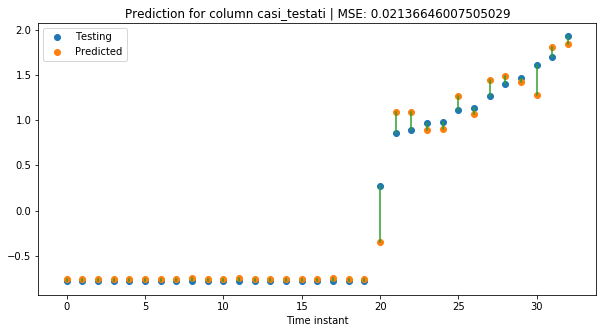

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


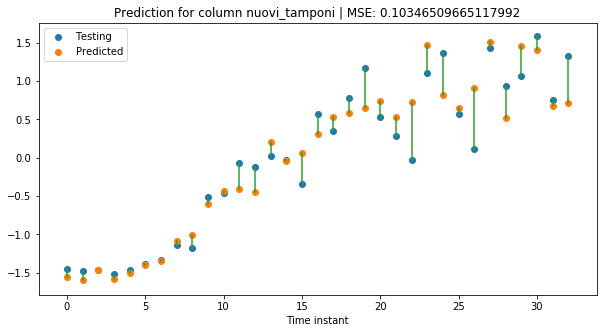

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


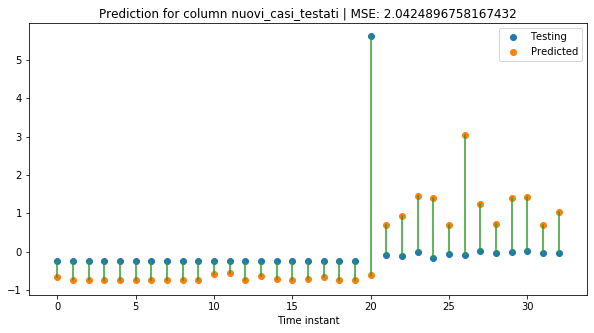

/home/marco/IDE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


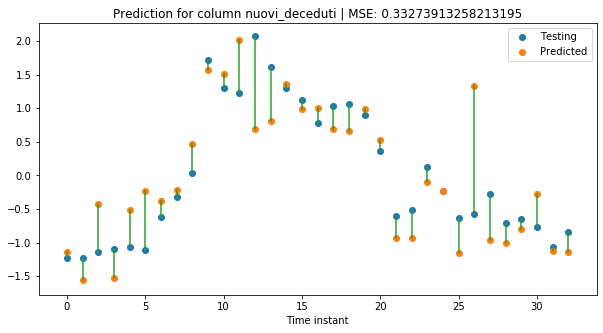

In [15]:
from sklearn.ensemble import RandomForestRegressor as Reg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.metrics import mean_squared_error as mse

average_mse = np.inf

#for test_size in np.linspace(0.1, 0.5, 10):
#    for n_estimators in [60, 80, 100, 110]:
#        for bootstrap in [True, False]:
#            for oob_score in [True,False]:

test_size = 0.33
n_estimators = 100
bootstrap = True
oob_score = False


for prociv_col in prociv_national.columns[1:]:

    indexes = [i for i in prociv_national.index if prociv_national.loc[i, 'data'] in complete_dataset.timestamp.values]
    
    train = complete_dataset
    target = prociv_national.loc[indexes, ['data', prociv_col]]
               

    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

    
    
    regressor = Reg(n_estimators = 100, 
                   bootstrap = bootstrap, 
                   oob_score = oob_score,
                   n_jobs = -1) #`Use all cores


    X_train = X_train.sort_values(by = 'timestamp', ascending = True)
    X_test = X_test.sort_values(by = 'timestamp', ascending = True)
    y_train = y_train.sort_values(by = 'data', ascending = True)
    y_test = y_test.sort_values(by = 'data', ascending = True)
    
    #X_train.drop(columns = ['timestamp'], inplace = True)
    #X_test.drop(columns = ['timestamp'], inplace = True)
    
    
    y_train.drop(columns = ['data'], inplace = True)
    y_train = y_train.values
    
    y_test.drop(columns = ['data'], inplace = True)
    y_test = y_test.values
    
    
    regressor.fit(X_train, y_train)
    
    predicted_y = regressor.predict(X_test)

    all_data = []

    for i in range(len(predicted_y)):
        all_data.append([y_test[i], predicted_y[i]])

    scaler = Scaler()

    y_test = []
    y_pred = []
    
    
    for elem in scaler.fit_transform(all_data):

        y_test.append(elem[0])
        y_pred.append(elem[1])

    mean_square_error = mse(y_test, y_pred)
    #print(mean_square_error)
    
    plt.figure(figsize = (10, 5))
    plt.scatter(range(len(y_test)), y_test, color = 'C0')
    plt.scatter(range(len(y_test)), y_pred, color = 'C1')
    plt.title('Prediction for column ' + prociv_col + ' | MSE: '+ str((mean_square_error)))
    
    plt.xlabel('Time instant')
    plt.legend(['Testing', 'Predicted'])

    for x, y1, y2 in zip(range(len(y_test)), y_test, y_pred):
        plt.plot([x,x], [y1, y2], color = 'C2')

    plt.savefig('/home/marco/workspace/git/StatLearnTeam/articles_analysis/plots/predictions/with_timestamp/column_'+prociv_col+'.png')
    plt.show()
    
    
    